In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Seed the random number generator
np.random.seed(42)

In [7]:
# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

In [8]:
# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

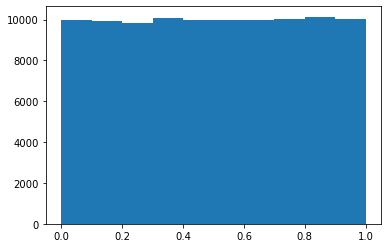

In [9]:
# Plot a histogram
plt.hist(random_numbers)
plt.show()

In [16]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0
    
    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()
        
        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1
    return n_success

In [17]:
# Seed random number generator
np.random.seed(42)

In [18]:
# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

In [19]:
# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)

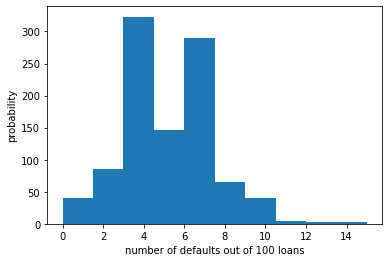

In [22]:
# Plot the histogram with default number of bins; label your axes
plt.hist(n_defaults)
plt.xlabel("number of defaults out of 100 loans")
plt.ylabel("probability")
plt.show()

# Will the bank fail?

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

In [23]:
def ecdf(data):
    """Compute the number for a one-dimensional array of measurements"""
    
    # Number of data points
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    return x, y

In [24]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(n_defaults)

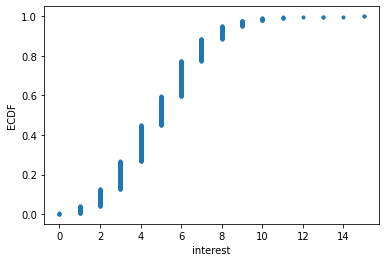

In [25]:
# Plot the ECDF with labeled axes
plt.plot(x_vers, y_vers, marker = ".", linestyle = "none")
plt.xlabel("interest")
plt.ylabel("ECDF")
plt.show()

In [26]:
# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

In [27]:
# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

Probability of losing money = 0.022


# Sampling out of the Binomial distribution

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). This is identical to the calculation you did in the last set of exercises using your custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

Note: For this exercise and all going forward, the random number generator is pre-seeded for you (with np.random.seed(42)) to save you typing that each time.

In [28]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100, 0.05, size=10000)

In [29]:
# Compute CDF: x, y
x, y = ecdf(n_defaults)

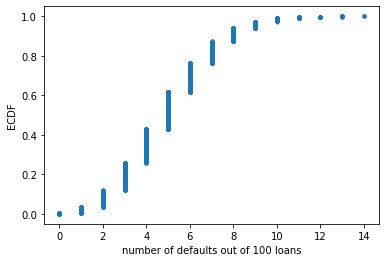

In [31]:
# Plot the CDF with axis labels
plt.plot(x, y, marker = ".", linestyle = "none")
plt.xlabel("number of defaults out of 100 loans")
plt.ylabel("ECDF")
plt.show()

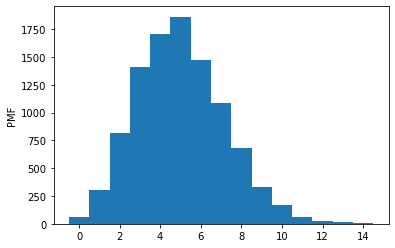

In [33]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, bins = bins)

# Label axes
plt.xlabel("")
plt.ylabel("PMF")

# Show the plot
plt.show()

# Relationship between Binomial and Poisson distributions

You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to  approximates a Binomial distribution for  Bernoulli trials with probability  of success (with  large and  small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

In [34]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size = 10000)

In [35]:
# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

Poisson:      10.0145 3.1713545607516043


In [36]:
# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

In [38]:
# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

n = 20 Binom: 10.059 2.2356920628744916
n = 100 Binom: 10.0446 2.993628373729779
n = 1000 Binom: 10.0128 3.1398146696899167
